<a href="https://colab.research.google.com/github/saiyanprince10/ai-projects/blob/dev/IAI_Sp25_HW2_ssuryaar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IAI Assignment 2
## Author: Suryaa Raman
## Andrew ID: ssuryaar

In [44]:
import numpy as np
import random
import math
from collections import defaultdict

In [45]:
# Class to represent the 4x4 Tic-Tac-Toe game
class TicTacToe4x4:
    def __init__(self, dim=4):
        self.dim = dim
        self.board = np.zeros((dim, dim), dtype=int)
        self.current_player = 1
    def reset(self):
        self.board = np.zeros((self.dim, self.dim), dtype=int)

    def copy(self):
        new_board = TicTacToe4x4(self.dim)
        new_board.board = self.board.copy()
        new_board.current_player = self.current_player
        return new_board

    def available_moves(self):
        # Returns a list of all available moves (empty spaces)
        return [(i, j) for i in range(self.dim) for j in range(self.dim) if self.board[i, j] == 0]
        # return np.argwhere(self.board == 0) - this returns an ndarray, but the comment says we must return a list

    def make_move(self, move:int, player:int):
        # Places the current player's mark on the board
        i, j = move
        if self.board[i, j] == 0:
          self.board[i, j] = player
          return True
        return False
        # Switches turn to the other player
        self.current_player = 3 - self.current_player

    def undo_move(self, move):
        # Removes a move from the board'
        i, j = move
        if self.board[i, j] != 0:
          self.board[i, j] = 0


    def check_winner(self,player:int):
        # Checks if a player has won the game
        # Check rows, columns, and diagonals for a win
        for i in range(self.dim):
            if np.all(self.board[i, :] == player) or np.all(self.board[:, i] == player):
                return True

        if np.all(np.diag(self.board) == player) or np.all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False
    def is_draw(self):
        # Checks if the game is a draw
        return np.all(self.board != 0)

    def display(self):
        print(self.board)

## Both players play randomly

In [46]:
import random
def random_player(board, player):
    moves = board.available_moves()
    return random.choice(moves)

In [47]:
def play_random_game():
    board = TicTacToe4x4()
    current_player = 1
    while True:
        # get a random move
        move = random_player(board, current_player)
        # make the move
        board.make_move(move, current_player)
        # check if the current player is winning
        if board.check_winner(current_player):
            # if yes, end the game
            print('player {} winning!'.format(current_player))
            board.display()
            return current_player
            # break

        # if not, check if it's a draw
        if board.is_draw():
            # if yes, end the game
            print('draw!')
            board.display()
            return 0
            # break

        # switch between Player 1 and 2
        current_player = 3 - current_player

Game 1/200
player 2 winning!
[[0 1 1 1]
 [2 2 2 2]
 [1 1 2 1]
 [0 2 2 1]]
Game 2/200
draw!
[[2 2 2 1]
 [1 1 1 2]
 [1 2 1 2]
 [1 1 2 2]]
Game 3/200
draw!
[[2 1 2 1]
 [2 2 1 1]
 [1 1 2 2]
 [2 1 2 1]]
Game 4/200
draw!
[[2 2 1 2]
 [2 1 1 1]
 [1 2 1 1]
 [1 2 2 2]]
Game 5/200
player 1 winning!
[[1 1 1 1]
 [1 0 1 2]
 [0 2 2 1]
 [0 2 2 2]]
Game 6/200
draw!
[[1 2 2 2]
 [2 1 1 1]
 [1 2 1 1]
 [2 2 1 2]]
Game 7/200
draw!
[[2 2 1 2]
 [1 2 2 1]
 [1 1 1 2]
 [2 1 2 1]]
Game 8/200
draw!
[[1 2 2 2]
 [2 1 1 1]
 [1 2 1 1]
 [2 1 2 2]]
Game 9/200
draw!
[[1 2 2 2]
 [1 2 1 2]
 [1 1 1 2]
 [2 2 1 1]]
Game 10/200
draw!
[[2 1 1 1]
 [2 2 2 1]
 [2 1 2 2]
 [1 1 2 1]]
Game 11/200
player 1 winning!
[[1 1 1 1]
 [1 2 2 2]
 [2 0 2 0]
 [0 1 0 0]]
Game 12/200
draw!
[[2 2 2 1]
 [1 2 2 1]
 [1 1 1 2]
 [2 1 2 1]]
Game 13/200
player 2 winning!
[[1 0 1 1]
 [1 2 1 0]
 [1 0 2 0]
 [2 2 2 2]]
Game 14/200
draw!
[[2 1 2 2]
 [2 1 1 1]
 [1 2 1 2]
 [1 1 2 2]]
Game 15/200
draw!
[[1 1 2 2]
 [1 1 2 2]
 [2 2 1 1]
 [1 1 2 2]]
Game 16/200
play

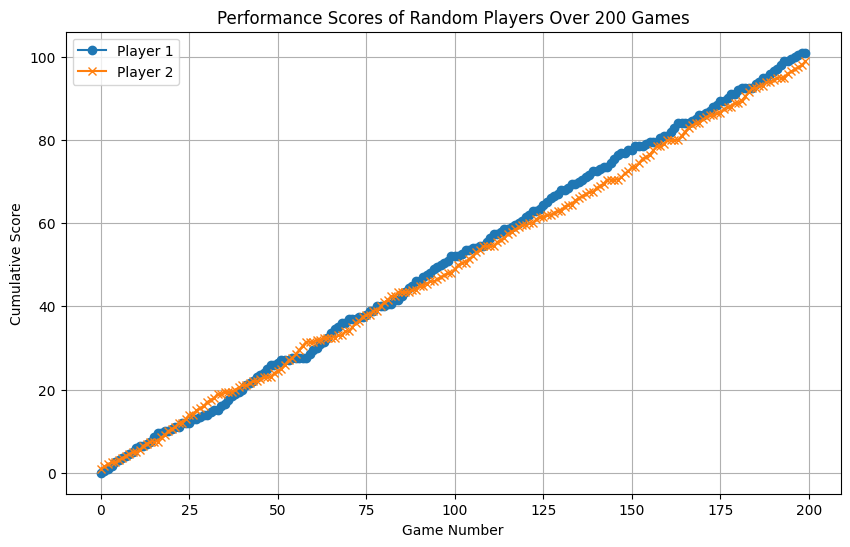

In [61]:
import matplotlib.pyplot as plt

# Play the game 200 times and keep track of the results
n_games = 200
scores = {1:0,2:0}
cumulative_scores_p1 = []
cumulative_scores_p2 = []
for i in range(n_games):
    print('Game {}/{}'.format(i+1,n_games))
    result = play_random_game()
    if result ==1:
      scores[1] += 1
    elif result == 2:
      scores[2] += 1
    else:
      scores[1] += 0.5
      scores[2] += 0.5
    cumulative_scores_p1.append(scores[1])
    cumulative_scores_p2.append(scores[2])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_games), cumulative_scores_p1, marker='o', label='Player 1')
plt.plot(range(n_games), cumulative_scores_p2, marker='x', label='Player 2')
plt.title(f'Performance Scores of Random Players Over {n_games} Games')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Score')
plt.grid(True)
plt.legend()
plt.show()

In [59]:
## Scores of players
scores

{1: 51.5, 2: 48.5}

## MCTS

In [49]:
# Monte Carlo Tree Search Node
class MCTSNode:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent
        self.children = []
        self.score = 0
        self.visits = 0

    def update_stats(self,result):
      self.visits += 1
      if result ==1:
        self.score += 1
      elif result == 0:
        self.score += 0.5

    def add_child(self, child_node):
        self.children.append(child_node)

    def is_fully_expanded(self):
        return len(self.children) == len(self.state.available_moves())

    def best_child(self, exploration_weight=1.4):
      best_score = float('-inf')
      best_child = None
      for child in self.children:
        if child.visits == 0:
          return child
        ucb_score = (child.score / child.visits) + exploration_weight * math.sqrt(math.log(self.visits) / child.visits)
        if ucb_score > best_score:
          best_score = ucb_score
          best_child = child
      return best_child

In [50]:
# Monte Carlo Tree Search Algorithm
class MCTS:
   def __init__(self, itermax=1000, exploration_weight=1.4):
        self.itermax = itermax
        self.exploration_weight = exploration_weight
        self.root = None

   def search(self, state):
        self.root = MCTSNode(state)
        for _ in range(self.itermax):
            node = self.root
            # While node is fully expanded and has children
            while node.is_fully_expanded() and node.children:
                node = node.best_child(self.exploration_weight)
            # Selection, expansion, simulation, backpropogation
            if not node.is_fully_expanded():
                self._expand(node)
                child_node = random.choice(node.children)
                simulation_result = self._simulate(child_node.state)
                self._backpropagate(child_node, simulation_result)
        return self.root

   def _expand(self, node):
        # Expansion phase - add new children nodes
        for move in node.state.available_moves():
            new_state = TicTacToe4x4()
            new_state.board = node.state.board.copy()
            new_state.current_player = node.state.current_player
            new_state.make_move(move ,new_state.current_player)
            child_node = MCTSNode(new_state, parent=node)
            node.add_child(child_node)

   def _simulate(self, state):
        # Simulation phase - play a random game
        current_state = TicTacToe4x4()
        current_state.board = state.board.copy()
        current_state.current_player = state.current_player
        while not (current_state.check_winner(current_state.current_player) or current_state.is_draw()):
            moves = current_state.available_moves()
            move = random.choice(moves)
            current_state.make_move(move, current_state.current_player)
            current_state.current_player = 3 - current_state.current_player
        # Return the result of the simulation
        return current_state.check_winner(3 - current_state.current_player)

   def _backpropagate(self, node, result):
        # Backpropagation phase - update values up the tree
        while node is not None:
            node.update_stats(result)
            # Invert result for opponent
            result = 1-result if result != 0 else 0
            node = node.parent

In [51]:
# Function to simulate a game between MCTS and a random player
def play_game():
    board = TicTacToe4x4()
    mcts = MCTS()
    current_player = 1

    while True:
      # Check who is current player
      if current_player == 1:
        #MCTS makes move
        mcts.search(board)
        best_child = mcts.root.best_child()
        available_moves = board.available_moves()
        for move in available_moves:
          temp_board = TicTacToe4x4()
          temp_board.board = board.board.copy()
          temp_board.make_move(move, current_player)
          if np.array_equal(temp_board.board, best_child.state.board):
            board.make_move(move, current_player)
            break
      else:
        #Random player makes move
        move = random_player(board, current_player)
        board.make_move(move,current_player)
      #check if current player is winning
      if board.check_winner(current_player):
        print('player {} winning!'.format(current_player))
        board.display()
        return current_player
      #if not, check if it's a draw
      if board.is_draw():
        print('draw!')
        board.display()
        return 0
      #switch between Player 1 and 2
      current_player = 3 - current_player

Game 1/200
player 1 winning!
[[1 1 2 0]
 [1 2 1 1]
 [1 2 2 2]
 [1 2 1 2]]
Game 2/200
player 2 winning!
[[1 1 1 2]
 [2 1 1 1]
 [1 1 2 2]
 [2 2 2 2]]
Game 3/200
draw!
[[1 1 1 2]
 [1 2 1 1]
 [1 2 2 2]
 [2 1 2 2]]
Game 4/200
player 1 winning!
[[1 2 1 1]
 [2 2 1 2]
 [1 1 1 1]
 [2 2 2 0]]
Game 5/200
player 2 winning!
[[2 1 1 2]
 [1 2 1 1]
 [1 2 1 1]
 [2 2 2 2]]
Game 6/200
draw!
[[1 1 1 2]
 [2 2 1 1]
 [1 2 2 1]
 [2 1 2 2]]
Game 7/200
player 1 winning!
[[1 2 1 0]
 [1 1 1 1]
 [1 2 0 2]
 [2 0 2 2]]
Game 8/200
draw!
[[1 2 1 2]
 [1 1 1 2]
 [1 2 2 1]
 [2 1 2 2]]
Game 9/200
draw!
[[2 1 1 1]
 [2 1 2 1]
 [1 2 2 1]
 [2 2 1 2]]
Game 10/200
draw!
[[1 1 2 2]
 [2 1 1 1]
 [2 2 1 2]
 [1 1 2 2]]
Game 11/200
draw!
[[2 2 1 1]
 [1 2 1 1]
 [1 1 2 2]
 [2 2 2 1]]
Game 12/200
player 2 winning!
[[2 1 2 2]
 [1 1 1 2]
 [1 1 1 2]
 [2 2 1 2]]
Game 13/200
player 2 winning!
[[1 1 0 2]
 [1 0 1 2]
 [1 0 2 2]
 [0 0 0 2]]
Game 14/200
player 1 winning!
[[1 2 2 2]
 [1 1 1 1]
 [1 2 0 1]
 [0 2 0 2]]
Game 15/200
player 1 winning!
[

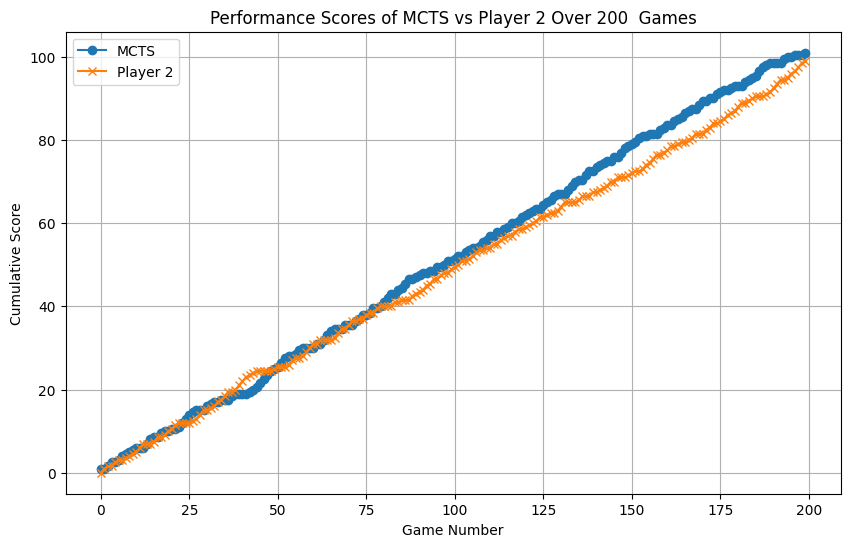

In [55]:
# Play the game 200 times and keep track of the results
n_mcts_games = 200
mcts_scores = {1:0,2:0}
cumul_scores_mcts = []
cumul_scores_p2 = []
for i in range(n_mcts_games):
    print('Game {}/{}'.format(i+1,n_mcts_games))
    result_2 = play_game()
    if result_2 ==1:
      mcts_scores[1] += 1
    elif result_2 == 2:
      mcts_scores[2] += 1
    else:
      mcts_scores[1] += 0.5
      mcts_scores[2] += 0.5
    cumul_scores_mcts.append(mcts_scores[1])
    cumul_scores_p2.append(mcts_scores[2])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(n_mcts_games), cumul_scores_mcts, marker='o', label='MCTS')
plt.plot(range(n_mcts_games), cumul_scores_p2, marker='x', label='Player 2')
plt.title(f"Performance Scores of MCTS vs Player 2 Over {n_mcts_games}  Games")
plt.xlabel('Game Number')
plt.ylabel('Cumulative Score')
plt.grid(True)
plt.legend()
plt.show()

## Scores of players

In [60]:
mcts_scores

{1: 101.0, 2: 99.0}